<h1> 1. Understanding the Dataset </h1>

<h3> IMPORT </h3>

In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler


In [2]:
#import dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

<h3> UNDERSTANDING THE DATA </h3>

In [3]:
#check the columns of train dataset
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
#structure of train dataset
print('original rows:', train.shape[0], 'original columns:', train.shape[1])

#structure of test dataset
print('test rows:', test.shape[0], 'test columns:', test.shape[1])

original rows: 1460 original columns: 81
test rows: 1459 test columns: 80


In [5]:
#training data information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
#testing data information
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [7]:
#types of variables 
np.unique(train.dtypes)

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [8]:
#Variables with float64
train.select_dtypes(include = ['float64']).dtypes

LotFrontage    float64
MasVnrArea     float64
GarageYrBlt    float64
dtype: object

In [9]:
#variables with integer
train.select_dtypes(include = ['int64']).dtypes

Id               int64
MSSubClass       int64
LotArea          int64
OverallQual      int64
OverallCond      int64
YearBuilt        int64
YearRemodAdd     int64
BsmtFinSF1       int64
BsmtFinSF2       int64
BsmtUnfSF        int64
TotalBsmtSF      int64
1stFlrSF         int64
2ndFlrSF         int64
LowQualFinSF     int64
GrLivArea        int64
BsmtFullBath     int64
BsmtHalfBath     int64
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
KitchenAbvGr     int64
TotRmsAbvGrd     int64
Fireplaces       int64
GarageCars       int64
GarageArea       int64
WoodDeckSF       int64
OpenPorchSF      int64
EnclosedPorch    int64
3SsnPorch        int64
ScreenPorch      int64
PoolArea         int64
MiscVal          int64
MoSold           int64
YrSold           int64
SalePrice        int64
dtype: object

In [10]:
#Variables with object
train.select_dtypes(include = ['object']).dtypes

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

<h3> Variables </h3>

In [11]:
#Numerical Variables
numerics = ['int64', 'float64']
numeric_train  = train.select_dtypes(include = numerics)  
numeric_train = numeric_train.drop(columns = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','GarageYrBlt', 'MoSold', 'YrSold', 'YearRemodAdd', 'OverallQual',
                                             'OverallCond', 'YearBuilt','MSSubClass'])
numeric_train.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,65.0,8450,196.0,706,0,150,856,856,854,...,2,548,0,61,0,0,0,0,0,208500
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,...,2,460,298,0,0,0,0,0,0,181500
2,3,68.0,11250,162.0,486,0,434,920,920,866,...,2,608,0,42,0,0,0,0,0,223500
3,4,60.0,9550,0.0,216,0,540,756,961,756,...,3,642,0,35,272,0,0,0,0,140000
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,...,3,836,192,84,0,0,0,0,0,250000


In [12]:
# Factor Variables
factors = ['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']
train_factors = train[factors]
train_factors.head()

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
0,60,7,5,2003,2003,2003.0,2,2008
1,20,6,8,1976,1976,1976.0,5,2007
2,60,7,5,2001,2002,2001.0,9,2008
3,70,7,5,1915,1970,1998.0,2,2006
4,60,8,5,2000,2000,2000.0,12,2008


In [13]:
# Categorical Variables: Turned into Dummies by Owner
categories = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']
train_categories = train[categories]
train_categories.head()

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
0,1,0,2,1
1,0,1,2,0
2,1,0,2,1
3,1,0,1,0
4,1,0,2,1


In [14]:
# Categorical Variables 
categori = ['object']
catego = train.select_dtypes(include= categori)
catego.head()
categorical_train = pd.concat([catego, train_categories], axis=1, sort=False)
categorical_train.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Y,NaN,NaN,NaN,WD,Normal,1,0,2,1
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Y,NaN,NaN,NaN,WD,Normal,0,1,2,0
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Y,NaN,NaN,NaN,WD,Normal,1,0,2,1
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Y,NaN,NaN,NaN,WD,Abnorml,1,0,1,0
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Y,NaN,NaN,NaN,WD,Normal,1,0,2,1


<h3> UNDERSTAND THE SALEPRICE </h3>

In [15]:
#summary on SalePrice(target variable) from train dataset
train['SalePrice'].describe()
#All prices are greater than 0.

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The cheapest house sold for $34,900 and the most expensive for $755,000
The average sales price is $180,921, while median is $163,000


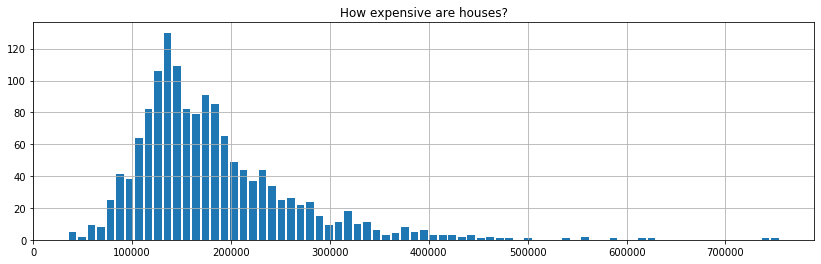

In [16]:
# How expensive are houses?
import matplotlib.pyplot as plt
print('The cheapest house sold for ${:,.0f} and the most expensive for ${:,.0f}'.format(
    train.SalePrice.min(), train.SalePrice.max()))
print('The average sales price is ${:,.0f}, while median is ${:,.0f}'.format(
    train.SalePrice.mean(), train.SalePrice.median()))
train.SalePrice.hist(bins=75, rwidth=.8, figsize=(14,4))
plt.title('How expensive are houses?')
plt.show()

Oldest house built in 1872. Newest house built in 2010.


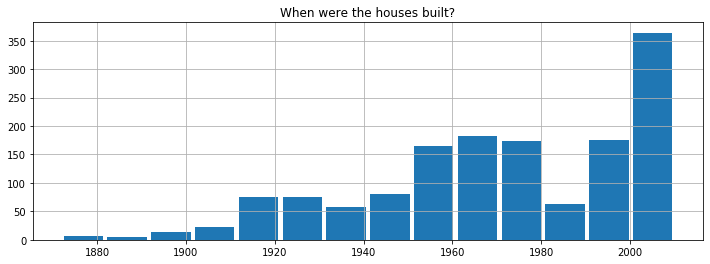

In [17]:
# When were the houses built?
print('Oldest house built in {}. Newest house built in {}.'.format(
    train.YearBuilt.min(), train.YearBuilt.max()))
train.YearBuilt.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('When were the houses built?')
plt.show()


In [18]:
# Sales Price
print('Skew: {:.3f} | Kurtosis: {:.3f}'.format(train.SalePrice.skew(), train.SalePrice.kurtosis()))

Skew: 1.883 | Kurtosis: 6.536


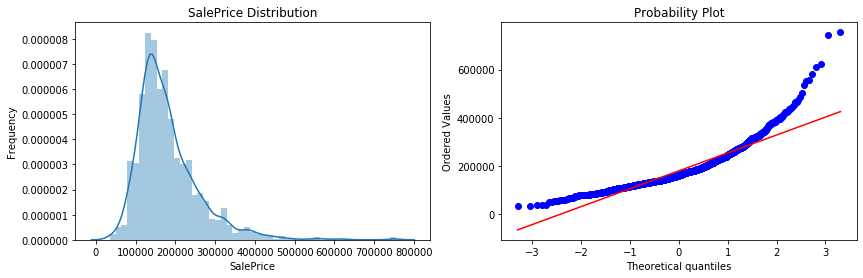

In [19]:
#histogram of SalePrice to see the distribution 
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,4))
sns.distplot(train['SalePrice'], ax = ax1)
ax1.set_ylabel('Frequency')
ax1.set_title('SalePrice Distribution')
#QQ-plot
stats.probplot(train['SalePrice'], plot=plt)
plt.show()
#this is right skewed (violating assumptions of linear regression) so we will need to normalize. 
#-> power transformation(rightskew -> power >1) or log transformation or box cox?


<h3> EDA </h3>

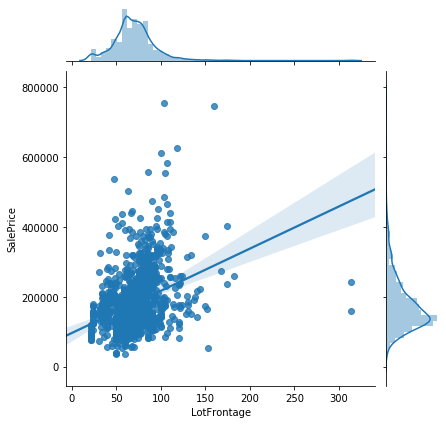

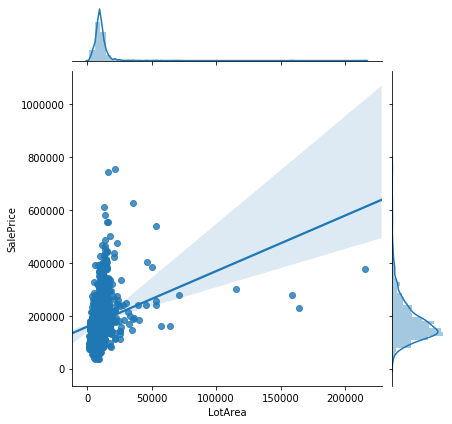

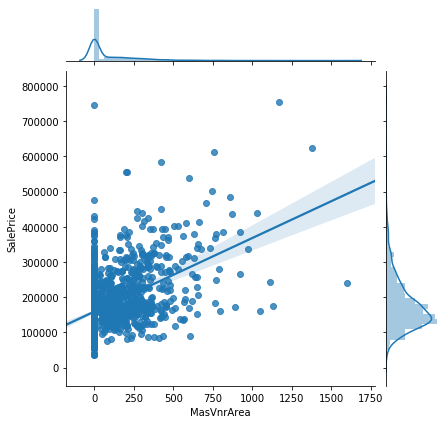

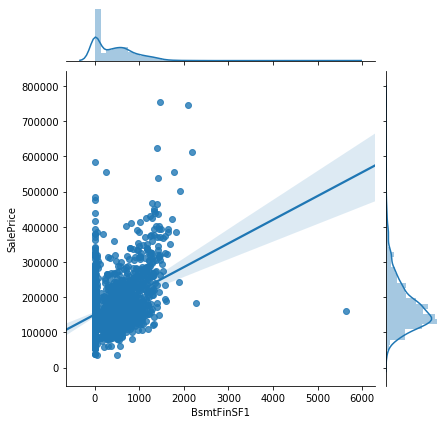

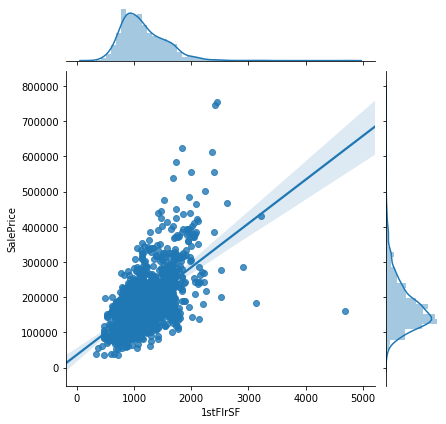

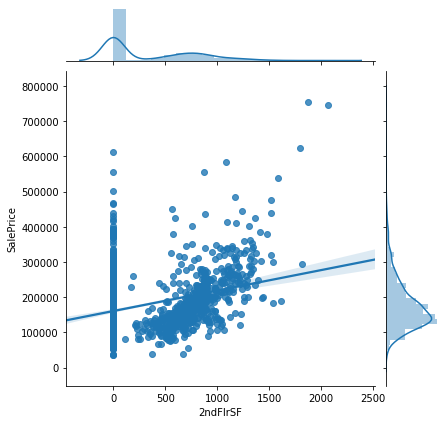

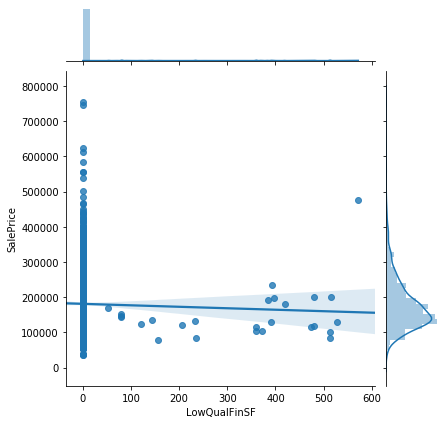

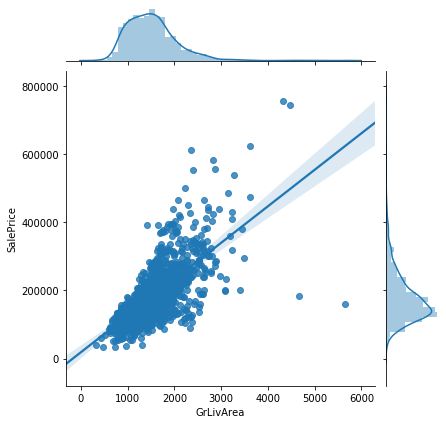

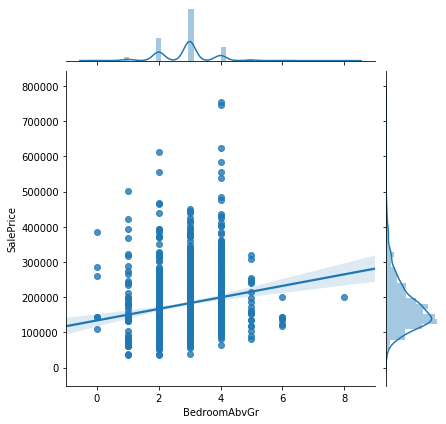

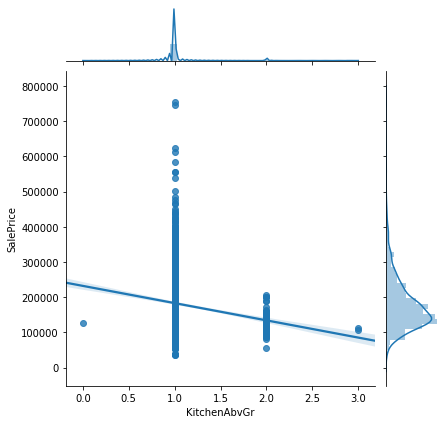

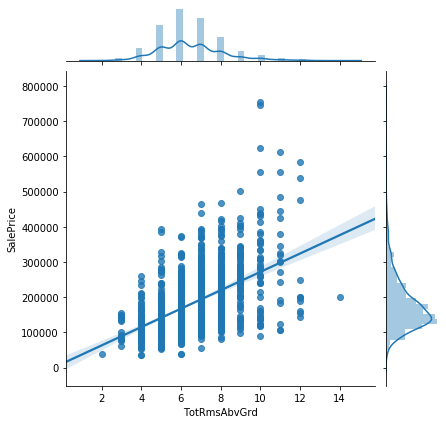

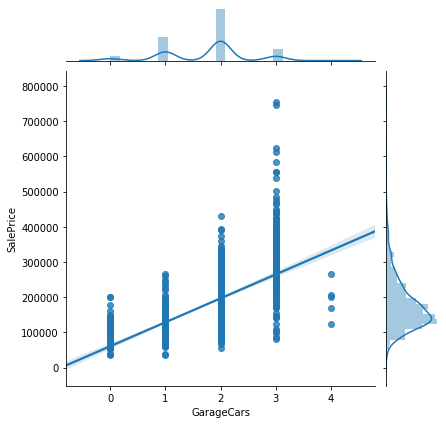

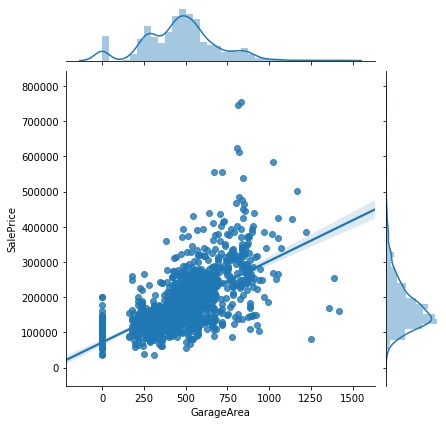

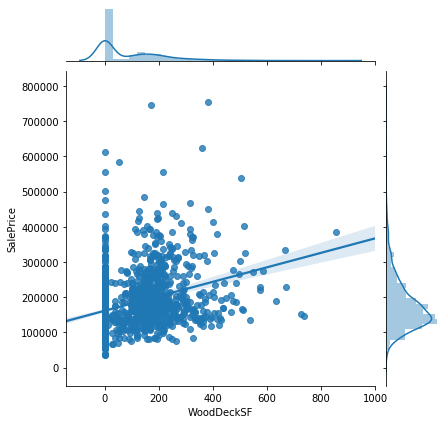

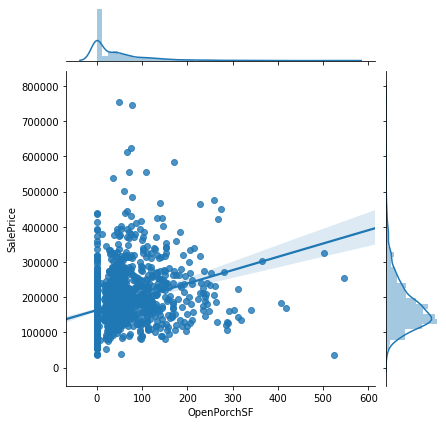

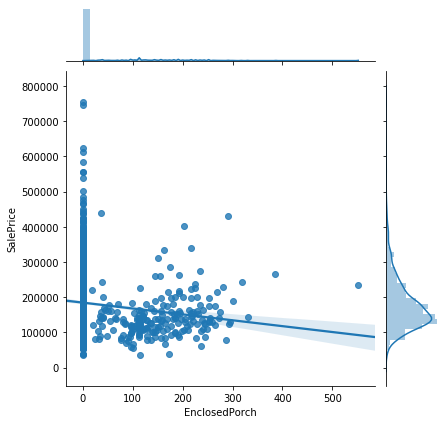

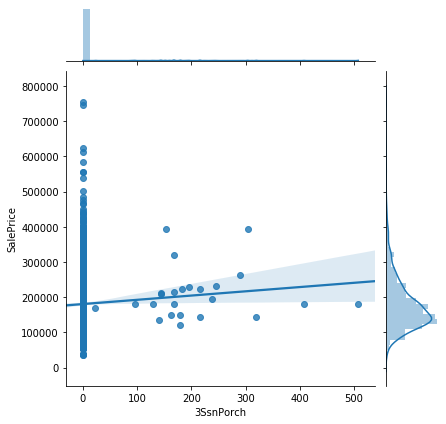

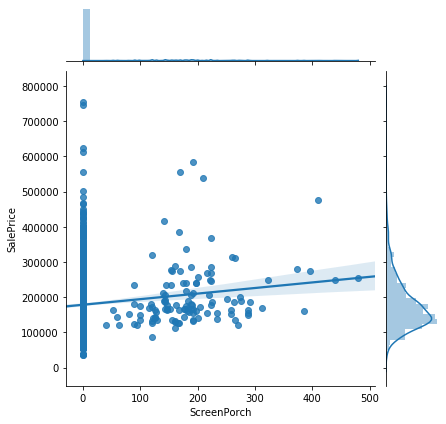

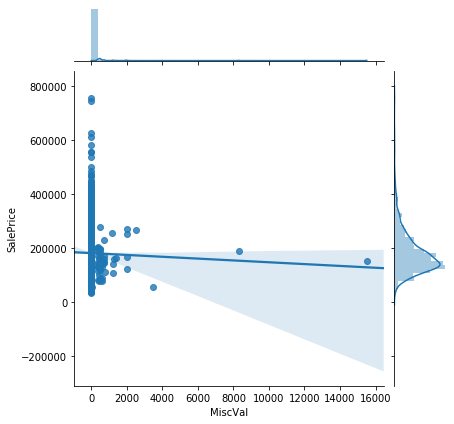

In [20]:
# Here is a scatter plot with dist plot for all numeric variables in the train data 
#by Sale Price
sns.jointplot(x="LotFrontage", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="LotArea", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="MasVnrArea", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="BsmtFinSF1", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="1stFlrSF", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="2ndFlrSF", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x='LowQualFinSF', y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="GrLivArea", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="BedroomAbvGr", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="KitchenAbvGr", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="TotRmsAbvGrd", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="GarageCars", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="GarageArea", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="WoodDeckSF", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="OpenPorchSF", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="EnclosedPorch", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="3SsnPorch", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="ScreenPorch", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="MiscVal", y="SalePrice", data=numeric_train, kind = 'reg')


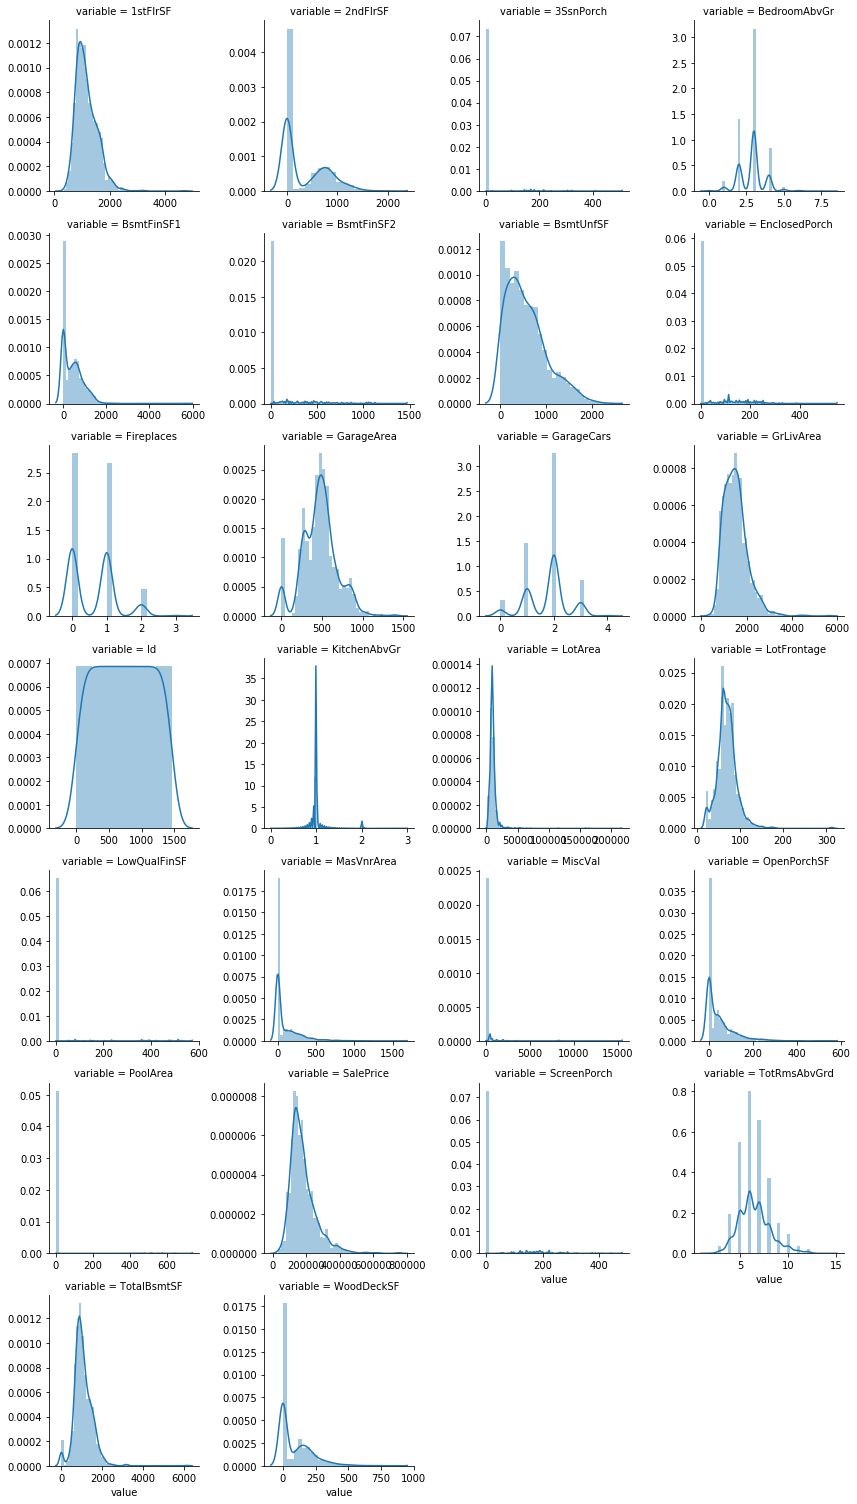

In [21]:
## Distribution Plots for Numerical Features
# Grid of distribution plots of all numerical features
f = pd.melt(numeric_train, value_vars=sorted(numeric_train))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

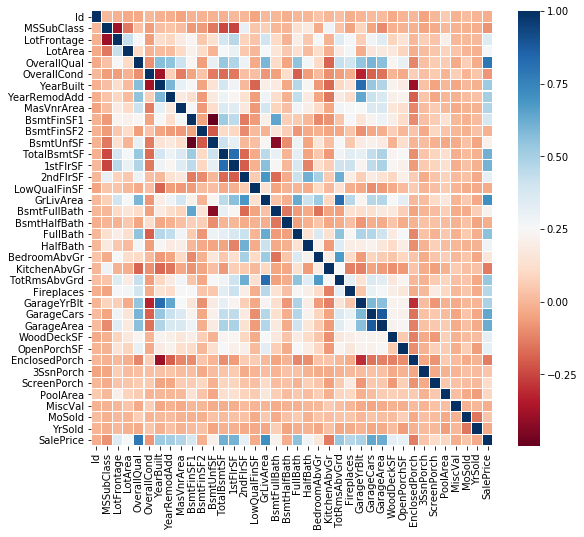

In [22]:
#Numeric variables correlation
numcor = train.corr()
colormap = plt.cm.RdBu
f, ax = plt.subplots(figsize = (9,8))
sns.heatmap(numcor, ax=ax, cmap = colormap, linewidths = 0.1)

In [23]:
s = numcor.unstack()
s[(abs(s)>0.6) & (abs(s) < 1)]

OverallQual   GarageCars      0.600671
              SalePrice       0.790982
YearBuilt     GarageYrBlt     0.825667
YearRemodAdd  GarageYrBlt     0.642277
BsmtFinSF1    BsmtFullBath    0.649212
TotalBsmtSF   1stFlrSF        0.819530
              SalePrice       0.613581
1stFlrSF      TotalBsmtSF     0.819530
              SalePrice       0.605852
2ndFlrSF      GrLivArea       0.687501
              HalfBath        0.609707
              TotRmsAbvGrd    0.616423
GrLivArea     2ndFlrSF        0.687501
              FullBath        0.630012
              TotRmsAbvGrd    0.825489
              SalePrice       0.708624
BsmtFullBath  BsmtFinSF1      0.649212
FullBath      GrLivArea       0.630012
HalfBath      2ndFlrSF        0.609707
BedroomAbvGr  TotRmsAbvGrd    0.676620
TotRmsAbvGrd  2ndFlrSF        0.616423
              GrLivArea       0.825489
              BedroomAbvGr    0.676620
GarageYrBlt   YearBuilt       0.825667
              YearRemodAdd    0.642277
GarageCars    OverallQual

/Users/bee/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


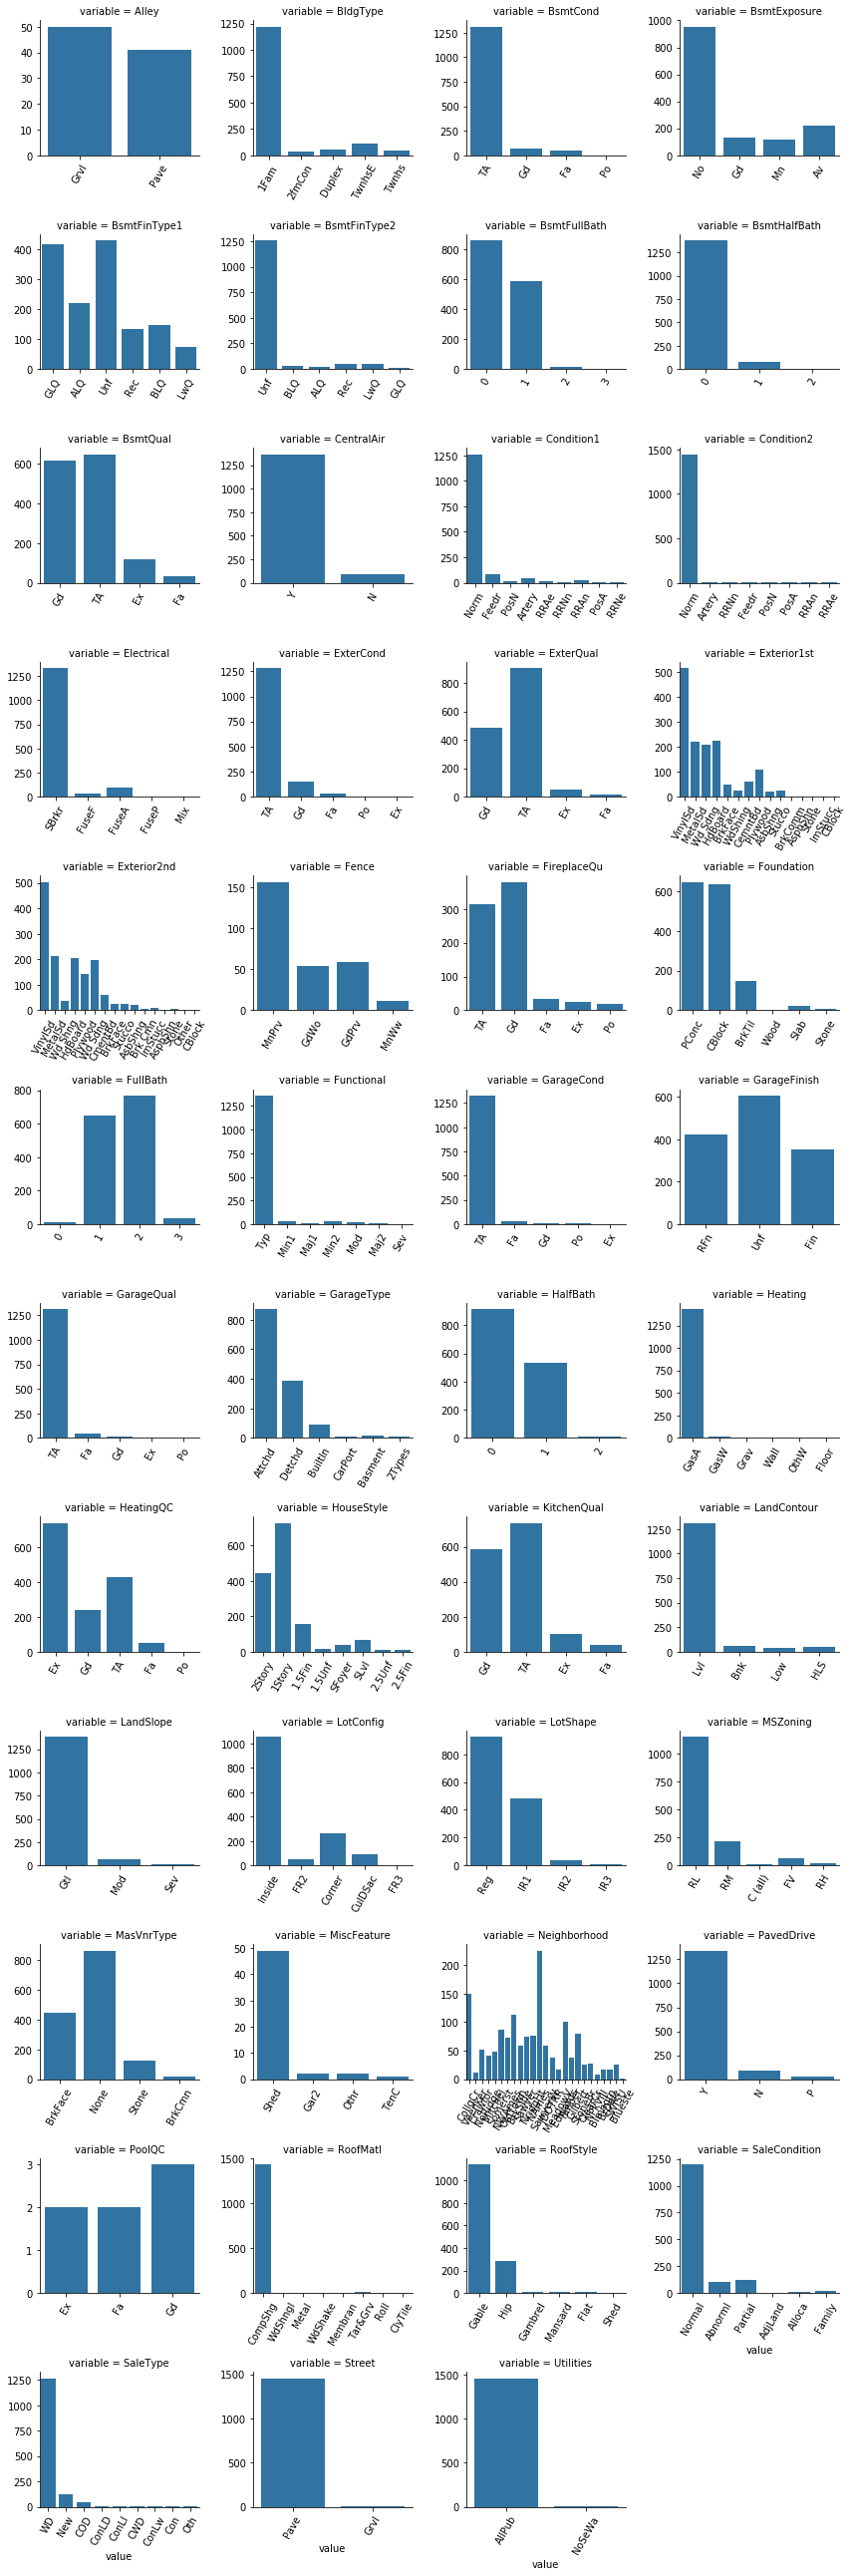

In [24]:
# Categorical Variables
categorical_train.columns
f = pd.melt(categorical_train, value_vars=sorted(categorical_train))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

/Users/bee/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/bee/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


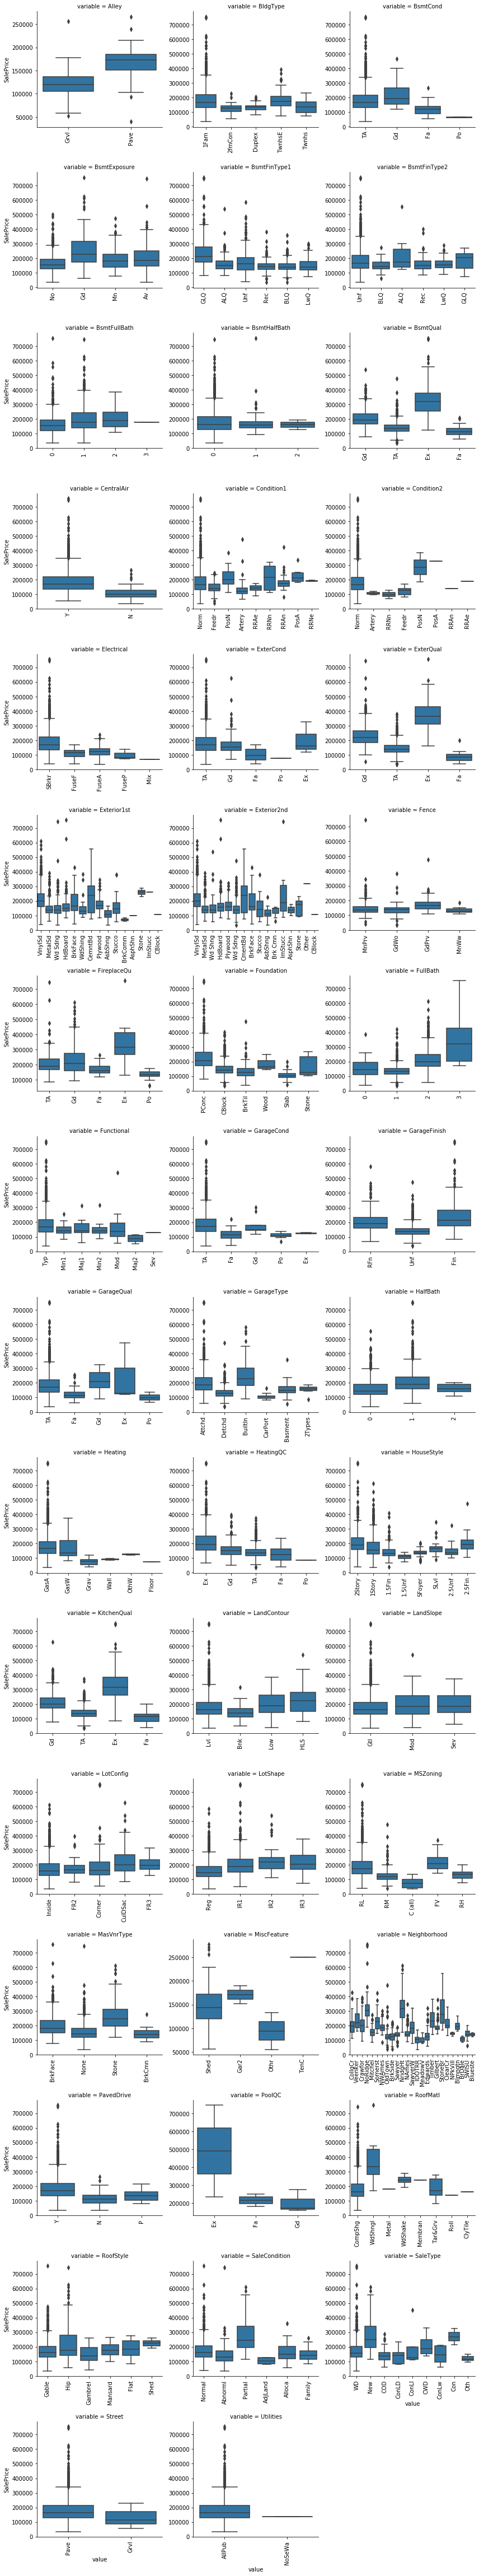

In [25]:
# Box Plot for Categorical Features
f = pd.melt(train, id_vars=['SalePrice'], value_vars=sorted(categorical_train))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, size=4)
g = g.map(sns.boxplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

/Users/bee/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


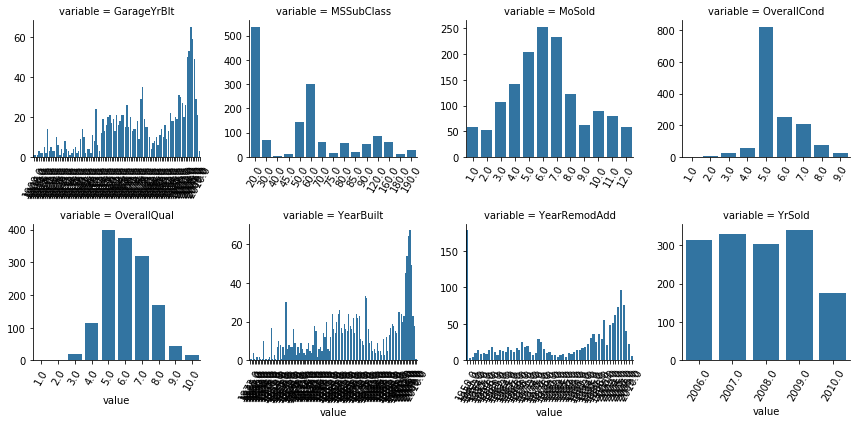

In [26]:
# Graphing Factors
f = pd.melt(train_factors, value_vars=sorted(train_factors))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

<h1> 2. Data Cleaning </h1>

<h3> Missing </h3>

In [27]:
# Missing Values Data Frame: Train 
missing = train.isna().sum()
missing = missing[missing>0]
missing_percent = missing/train.shape[0] * 100
train_missing = pd.DataFrame([missing, missing_percent], index = ['total', 'missing percent']).T
train_missing.sort_values(['missing percent'], ascending = [False])


,total,missing percent
PoolQC,1453.0,99.520548
MiscFeature,1406.0,96.301370
Alley,1369.0,93.767123
Fence,1179.0,80.753425
FireplaceQu,690.0,47.260274
LotFrontage,259.0,17.739726
GarageType,81.0,5.547945
GarageYrBlt,81.0,5.547945
GarageFinish,81.0,5.547945
GarageQual,81.0,5.547945


In [28]:
# Missing Values Data Frame: Test
missing_test = test.isna().sum()
missing_test = missing_test[missing_test>0]
missingtest_percent = missing_test/test.shape[0] * 100
test_missing = pd.DataFrame([missing_test, missingtest_percent], index = ['total', 'missing percent']).T
test_missing.sort_values(['missing percent'], ascending = [False])


,total,missing percent
PoolQC,1456.0,99.794380
MiscFeature,1408.0,96.504455
Alley,1352.0,92.666210
Fence,1169.0,80.123372
FireplaceQu,730.0,50.034270
LotFrontage,227.0,15.558602
GarageCond,78.0,5.346127
GarageYrBlt,78.0,5.346127
GarageQual,78.0,5.346127
GarageFinish,78.0,5.346127


In [29]:
# There are some that has missing only in train dataset and only in test dataset.
# first drop the SalePrice column of train dataset and
# then we will combine two dataset and then clean it. 
trainX = train.drop('SalePrice', axis =1)     #1460 rows with 80 columns
testX = test                                  #1459 rows with 80 columns
test_train = pd.concat([trainX, testX], keys=['train', 'test'])

In [30]:
#Check the test_train dataset
test_train.shape

(2919, 80)

In [31]:
# Dropping the columns with so many missing values. 
test_train = test_train.drop(columns= ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'Id'])
#not dropping poolarea since we can use that to assume that existing value means 
#there is a pool and if data is missing, it might be an indication that there is no pool. 

In [32]:
#Check the test_train dataset
test_train.shape

(2919, 75)

In [33]:
# Check the original Missing Values Data Frame: Test_Train 
missing = test_train.isna().sum()
missing = missing[missing>0]
missing_percent = missing/test_train.shape[0] * 100
test_train_missing = pd.DataFrame([missing, missing_percent], index = ['total', 'missing percent']).T
test_train_missing.sort_values(['missing percent'], ascending = [False])

,total,missing percent
FireplaceQu,1420.0,48.646797
LotFrontage,486.0,16.649538
GarageFinish,159.0,5.447071
GarageCond,159.0,5.447071
GarageQual,159.0,5.447071
GarageYrBlt,159.0,5.447071
GarageType,157.0,5.378554
BsmtCond,82.0,2.809181
BsmtExposure,82.0,2.809181
BsmtQual,81.0,2.774923


In [34]:
# Preprocessing: Imputation: Filling Missing Values 
test_train.loc[:, "BedroomAbvGr"] = test_train.loc[:, "BedroomAbvGr"].fillna(0)
test_train.loc[:, "BsmtQual"] = test_train.loc[:, "BsmtQual"].fillna("No")
test_train.loc[:, "BsmtCond"] = test_train.loc[:, "BsmtCond"].fillna("No")
test_train.loc[:, "BsmtExposure"] = test_train.loc[:, "BsmtExposure"].fillna("No")
test_train.loc[:, "BsmtFinType1"] = test_train.loc[:, "BsmtFinType1"].fillna("No")
test_train.loc[:, "BsmtFinType2"] = test_train.loc[:, "BsmtFinType2"].fillna("No")
test_train.loc[:, "BsmtFullBath"] = test_train.loc[:, "BsmtFullBath"].fillna(0)
test_train.loc[:, "BsmtHalfBath"] = test_train.loc[:, "BsmtHalfBath"].fillna(0)
test_train.loc[:, "BsmtUnfSF"] = test_train.loc[:, "BsmtUnfSF"].fillna(0)
test_train.loc[:, "CentralAir"] = test_train.loc[:, "CentralAir"].fillna("N")
test_train.loc[:, "Condition1"] = test_train.loc[:, "Condition1"].fillna("Norm")
test_train.loc[:, "Condition2"] = test_train.loc[:, "Condition2"].fillna("Norm")
test_train.loc[:, "EnclosedPorch"] = test_train.loc[:, "EnclosedPorch"].fillna(0)
test_train.loc[:, "ExterCond"] = test_train.loc[:, "ExterCond"].fillna("TA")
test_train.loc[:, "ExterQual"] = test_train.loc[:, "ExterQual"].fillna("TA")
test_train.loc[:, "FireplaceQu"] = test_train.loc[:, "FireplaceQu"].fillna("No")
test_train.loc[:, "Fireplaces"] = test_train.loc[:, "Fireplaces"].fillna(0)
test_train.loc[:, "Functional"] = test_train.loc[:, "Functional"].fillna("Typ")
test_train.loc[:, "GarageType"] = test_train.loc[:, "GarageType"].fillna("No")
test_train.loc[:, "GarageFinish"] = test_train.loc[:, "GarageFinish"].fillna("No")
test_train.loc[:, "GarageQual"] = test_train.loc[:, "GarageQual"].fillna("No")
test_train.loc[:, "GarageCond"] = test_train.loc[:, "GarageCond"].fillna("No")
test_train.loc[:, "GarageArea"] = test_train.loc[:, "GarageArea"].fillna(0)
test_train.loc[:, "GarageCars"] = test_train.loc[:, "GarageCars"].fillna(0)
test_train.loc[:, "HalfBath"] = test_train.loc[:, "HalfBath"].fillna(0)
test_train.loc[:, "HeatingQC"] = test_train.loc[:, "HeatingQC"].fillna("TA")
test_train.loc[:, "KitchenAbvGr"] = test_train.loc[:, "KitchenAbvGr"].fillna(0)
test_train.loc[:, "KitchenQual"] = test_train.loc[:, "KitchenQual"].fillna("TA")
test_train.loc[:, "LotFrontage"] = test_train.loc[:, "LotFrontage"].fillna(0)
test_train.loc[:, "LotShape"] = test_train.loc[:, "LotShape"].fillna("Reg")
test_train.loc[:, "MasVnrType"] = test_train.loc[:, "MasVnrType"].fillna("None")
test_train.loc[:, "MasVnrArea"] = test_train.loc[:, "MasVnrArea"].fillna(0)
test_train.loc[:, "MiscVal"] = test_train.loc[:, "MiscVal"].fillna(0)
test_train.loc[:, "OpenPorchSF"] = test_train.loc[:, "OpenPorchSF"].fillna(0)
test_train.loc[:, "PavedDrive"] = test_train.loc[:, "PavedDrive"].fillna("N")
test_train.loc[:, "SaleCondition"] = test_train.loc[:, "SaleCondition"].fillna("Normal")
test_train.loc[:, "ScreenPorch"] = test_train.loc[:, "ScreenPorch"].fillna(0)
test_train.loc[:, "TotRmsAbvGrd"] = test_train.loc[:, "TotRmsAbvGrd"].fillna(0)
test_train.loc[:, "Utilities"] = test_train.loc[:, "Utilities"].fillna("AllPub")
test_train.loc[:, "WoodDeckSF"] = test_train.loc[:, "WoodDeckSF"].fillna(0)
test_train.loc[:, "Exterior1st"] = test_train.loc[:, "Exterior1st"].fillna("No")
test_train.loc[:, "Exterior2nd"] = test_train.loc[:, "Exterior2nd"].fillna("No")
test_train.loc[:, "BsmtFinSF1"] = test_train.loc[:, "BsmtFinSF1"].fillna(0)
test_train.loc[:, "BsmtFinSF2"] = test_train.loc[:, "BsmtFinSF2"].fillna(0)
test_train.loc[:, "TotalBsmtSF"] = test_train.loc[:, "TotalBsmtSF"].fillna(0)
test_train.loc[:, "Electrical"] = test_train.loc[:, "Electrical"].fillna("Electrical")
test_train.loc[:, "SaleType"] = test_train.loc[:, "SaleType"].fillna("WD")
test_train.loc[:, "GarageYrBlt"] = test_train.loc[:, "GarageYrBlt"].fillna("None")
test_train.loc[:, "PoolArea"] = test_train.loc[:, "PoolArea"].fillna("0")
test_train.loc[:, "MSZoning"] = test_train.loc[:, "MSZoning"].fillna("RL")

In [35]:
# Check the Final Missing Values Data Frame: Test_Train 
missing = test_train.isna().sum()
missing = missing[missing>0]
missing_percent = missing/test_train.shape[0] * 100
test_train_missing = pd.DataFrame([missing, missing_percent], index = ['total', 'missing percent']).T
test_train_missing.sort_values(['missing percent'], ascending = [False])
#nothing missing!

,total,missing percent


In [36]:
#Create a variable for Total SF
#Combine all Bsmt + 1st + 2nd fl, does not distinguish between quality
test_train['TotalSF'] = test_train['TotalBsmtSF'] + test_train['1stFlrSF'] + test_train['2ndFlrSF']

In [37]:
#Create a variable for Total SF
#Combine all Bsmt + 1st + 2nd fl, does not distinguish between quality
test_train['TotalSF'] = test_train['TotalBsmtSF'] + test_train['1stFlrSF'] + test_train['2ndFlrSF']

In [38]:
#Create Variable For Total Bath
#Half Baths are multiplied by 0.5 and Full are added as a whole
test_train['TotalBath'] = test_train['BsmtFullBath'] + test_train['FullBath'] + 0.5* test_train['BsmtHalfBath'] + 0.5 * test_train['HalfBath']

In [39]:
#Create Variable For Total Porch SF
#We do not distinguish between the variables
test_train['TotalPorchSF'] = test_train['WoodDeckSF'] + test_train['OpenPorchSF'] + test_train['EnclosedPorch']+ test_train['3SsnPorch']+ test_train['ScreenPorch']

In [40]:
#Create Dummy variable for finished bsmt
#not distinguishing between finish quality for basement only if the basement is unfinished
test_train['BsmtFin']= (test_train['BsmtFinType1'] != 'Unf')*1

In [41]:
#to check the final test_train after imputation and dummification
test_train

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
train 0             60       RL         65.0     8450   Pave      Reg   
      1             20       RL         80.0     9600   Pave      Reg   
      2             60       RL         68.0    11250   Pave      IR1   
      3             70       RL         60.0     9550   Pave      IR1   
      4             60       RL         84.0    14260   Pave      IR1   
      5             50       RL         85.0    14115   Pave      IR1   
      6             20       RL         75.0    10084   Pave      Reg   
      7             60       RL          0.0    10382   Pave      IR1   
      8             50       RM         51.0     6120   Pave      Reg   
      9            190       RL         50.0     7420   Pave      Reg   
      10            20       RL         70.0    11200   Pave      Reg   
      11            60       RL         85.0    11924   Pave      IR1   
      12            20       RL          0.0    12968   Pave      IR2   
      13            20       RL         91.0    10652   Pave      IR1   
      14            20       RL          0.0    10920   Pave      IR1   
      15            45       RM         51.0     6120   Pave      Reg   
      16            20       RL          0.0    11241   Pave      IR1   
      17            90       RL         72.0    10791   Pave      Reg   
      18            20       RL         66.0    13695   Pave      Reg   
      19            20       RL         70.0     7560   Pave      Reg   
      20            60       RL        101.0    14215   Pave      IR1   
      21            45       RM         57.0     7449   Pave      Reg   
      22            20       RL         75.0     9742   Pave      Reg   
      23           120       RM         44.0     4224   Pave      Reg   
      24            20       RL          0.0     8246   Pave      IR1   
      25            20       RL        110.0    14230   Pave      Reg   
      26            20       RL         60.0     7200   Pave      Reg   
      27            20       RL         98.0    11478   Pave      Reg   
      28            20       RL         47.0    16321   Pave      IR1   
      29            30       RM         60.0     6324   Pave      IR1   
...                ...      ...          ...      ...    ...      ...   
test  1429          30       RM         50.0     7030   Pave      Reg   
      1430          50       RM         75.0     9060   Pave      Reg   
      1431          30  C (all)         69.0    12366   Pave      Reg   
      1432         190  C (all)         50.0     9000   Pave      Reg   
      1433          50  C (all)         60.0     8520   Grvl      Reg   
      1434         120       RM         41.0     5748   Pave      IR1   
      1435         120       RM         44.0     3842   Pave      IR1   
      1436          20       RL         69.0    23580   Pave      IR1   
      1437          90       RL         65.0     8385   Pave      Reg   
      1438          20       RL         70.0     9116   Pave      Reg   
      1439          80       RL        140.0    11080   Pave      Reg   
      1440          20       RL          0.0    50102   Pave      IR1   
      1441          20       RL          0.0     8098   Pave      IR1   
      1442          20       RL         95.0    13618   Pave      Reg   
      1443          20       RL         88.0    11577   Pave      Reg   
      1444          20       RL        125.0    31250   Pave      Reg   
      1445          90       RM         78.0     7020   Pave      Reg   
      1446         160       RM         41.0     2665   Pave      Reg   
      1447          20       RL         58.0    10172   Pave      IR1   
      1448          90       RL          0.0    11836   Pave      IR1   
      1449         180       RM         21.0     1470   Pave      Reg   
      1450         160       RM         21.0     1484   Pave      Reg   
      1451          20       RL         80.0    13384   Pave      Reg 

In [42]:
#final test and train dataset
final_train = test_train.iloc[:1460,:]
final_test = test_train.iloc[1460:,:]
print('train', final_train.shape, 'final_test', final_test.shape)

train (1460, 79) final_test (1459, 79)


In [43]:
#created SalePrice df that just includes SalePrice. 
SalePrice = train.iloc[:,-1:]
SalePrice

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
5,143000
6,307000
7,200000
8,129900
9,118000


In [44]:
#reset index
final_train = final_train.reset_index()

In [45]:
#put back the SalePrice to train dataset
final_train['SalePrice'] = SalePrice['SalePrice']

In [46]:
#check the final_train dataset
final_train

,level_0,level_1,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,TotalBath,TotalPorchSF,BsmtFin,SalePrice
0,train,0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,...,0,2,2008,WD,Normal,2566.0,3.5,61,1,208500
1,train,1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,...,0,5,2007,WD,Normal,2524.0,2.5,298,1,181500
2,train,2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,...,0,9,2008,WD,Normal,2706.0,3.5,42,1,223500
3,train,3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,...,0,2,2006,WD,Abnorml,2473.0,2.0,307,1,140000
4,train,4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,...,0,12,2008,WD,Normal,3343.0,3.5,276,1,250000
5,train,5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,...,700,10,2009,WD,Normal,2158.0,2.5,390,1,143000
6,train,6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,...,0,8,2007,WD,Normal,3380.0,3.0,312,1,307000
7,train,7,60,RL,0.0,10382,Pave,IR1,Lvl,AllPub,...,350,11,2009,WD,Normal,3197.0,3.5,667,1,200000
8,train,8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,...,0,4,2008,WD,Abnorml,2726.0,2.0,295,0,129900
9,train,9,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,...,0,1,2008,WD,Normal,2068.0,2.0,4,1,118000


In [47]:
#Exporting final cleaned train dataset and cleaned 
final_train.to_csv('cleanedtrain.csv')
final_test.to_csv('cleanedtest.csv')